<a href="https://colab.research.google.com/github/joseeden/joeden/blob/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/009-Hacker-Statistics/Hacker_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hacker Statistics

Hacker statistics involve using simulations and random sampling to estimate probabilities or solve problems. It’s a powerful tool in data science for understanding complex systems.

# Random Number Generators

Example: Generate random numbers between 0 and 1. To do this, we can use `numpy` for randomness.   

In [65]:
import numpy as np

np.random.seed()
print(np.random.rand())

0.5103929257189281


# How the random numbers are generated

Those random numbers are typically generated using a mathematical formula, starting from a random seed which is chosen by Python when we ran the `rand` function. We can also set the seed manually.


In [66]:
import numpy as np

np.random.seed(123)       # Set seed for reproducibility
print(np.random.rand())

0.6964691855978616


# Simulating a Coin Toss

To simulate a coin toss, use `randint()`. If you specify the seed and run the code, you'll notice that it will return the same output every single time. If seed is not specified, the code can return either 0 or 1.

In [67]:
# Simulate a coin toss (0 = heads, 1 = tails)
import numpy as np

np.random.seed(246)             ## seed can be set to anything
coin = np.random.randint(0, 2)  ## 0 to 1, recall that index 2 is not included
print("Coin:", coin)

if coin == 0:
    print("Heads")
else:
    print("Tails")

Coin: 0
Heads


# Random Walk Game

Scenario: You're climbing the Empire State Building, playing a dice game.  

Rules:  

- Roll the dice 100 times.  
- If you roll **1 or 2**, go **1 step down** (but not below step 0).  
- If you roll **3, 4, or 5**, go **1 step up**.  
- If you roll a **6**, roll again and go up the resulting number of steps.  
- There's a **0.1% chance** of falling and starting over from step 0 each move.  

Your goal: **Reach step 60.**

# Solving the Game

How likely are you to win?  

- **Analytical solution:** Use equations to calculate probabilities (complex).  
- **Simulation:** Run thousands of random trials to estimate success probability.

The second approach, called **hacker statistics**, is the one we'll use.



In [68]:
import numpy as np 

np.random.seed()
dice = np.random.randint(1,7)

# Starting step
step = 50

if dice <= 2 :
    step = step - 1
elif dice >= 3 and dice < 6:
    step = step + 1
else :
    step = step + np.random.randint(1,7)

print(dice, step)

5 51


# Random Steps and Random Walks  

## Random Step  

Using a dice to decide your next move is a random step. Rolling it 100 times creates a sequence of random steps, known as a **random walk**.  

A random walk models various phenomena, like:  

- A molecule’s path in a liquid or gas.  
- A gambler’s changing financial status.  

To record these steps, you can build a list using a **for loop**.

## Heads or Tails Game  

Here's how to simulate a simple heads or tails game:  

- Import `numpy` and set a random seed.  
- Use a **for loop** to run the game 10 times.  
- Generate a random coin flip (0 = heads, 1 = tails).  
- Append the result as a string (`"heads"` or `"tails"`) to a list.  
- Print the list of outcomes.

This example output shows a list containing random outcomes but isn’t a random walk since each step is independent.  

```python
['heads', 'tails', 'heads', 'heads', 'tails', ...]
```

The code will look like this:

In [69]:
import numpy as np

np.random.seed(123)
outcomes = []

for x in range(10):
  coin = np.random.randint(0,2) ## return 0 for heads, 1 for tails, index 2 is not included.

  if coin == 0:
    outcomes.append("heads")  
  else:
    outcomes.append("tails")  

print(outcomes)    

['heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads']


## Turning Heads or Tails into a Random Walk  

To track total tails:  

- Start with a list containing `0` (no tails yet).  
- Use a **for loop** for 10 flips.  
- Add `coin` (0 or 1) to the previous total and append the result to the list.  

Example output:  
`[0, 1, 1, 2, 3, ...]`  

The last number shows the total tails flipped. 

If you compare the two scripts, you will see that the the first tracks independent steps, while the second accumulates results. This is how random steps transform into a **random walk**. 

In [70]:
import numpy as np

np.random.seed(123)
tails = [0]

for x in range(10):
  coin = np.random.randint(0,2) ## return 0 for heads, 1 for tails, index 2 is not included.
  tails.append(tails[x] + coin)

print(tails)    

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


# Going Back to Random Walk Game 

The main outline would be:

- Make a list that contains the first step, which is the integer 0.
- The loop should run 100 times.
- On each iteration, set step equal to the last element in the list. 
- Last element - You can use the index -1 for this.
- The if-elif-else construct updates the step

Now, there's another problem: you can't go below zero. One way to solve this is to use the `max()` function which accepts two values. Whichever is biggest between the two is returned by the function. 


In [71]:
import numpy as np 

np.random.seed(123)
random_walk = [0]       ## setting the list

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    # Find next step
    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

# Print random_walk
print(random_walk) 

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


# Visualize the Walk

Use `matplotlib` to create a plot of the outcome.

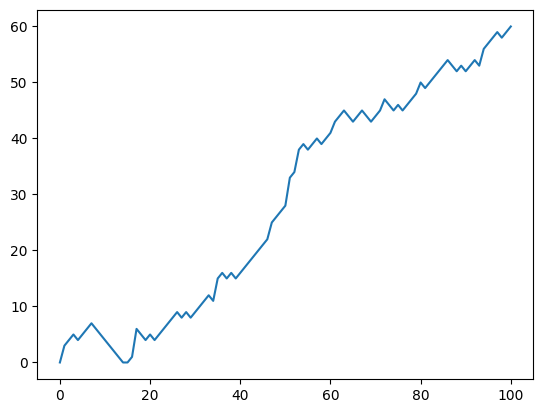

In [72]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)
random_walk = [0]       ## setting the list

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    # Find next step
    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

# Use matplotlib
plt.plot(random_walk)
plt.show()


# Distribution of Steps  

Throw a die 100 times to simulate a random walk, moving up or down based on the result. The main question: **what’s the chance of reaching 60 steps high?**  

- Each random walk ends on a different step.  
- Simulating this thousands of times creates a **distribution** of final steps.  
- This distribution helps calculate probabilities.

A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet. To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results.

- Set a random seed and create an empty list, `all_walks`.  
- Run a **for loop** 100 times to simulate 10 tosses per game.  
- Append the final number of tails for each game to `all_walks`.  

These values form a **distribution** ready for visualization.

In [73]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)

all_walks = []

for i in range(5) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        random_walk.append(step)

    all_walks.append(random_walk)

print(all_walks)


[[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60], [0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73], [0, 2, 1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 3

The `all_walks` is a list of lists: every sub-list represents a single random walk. If you convert this list of lists to a NumPy array, you can start making interesting plots.

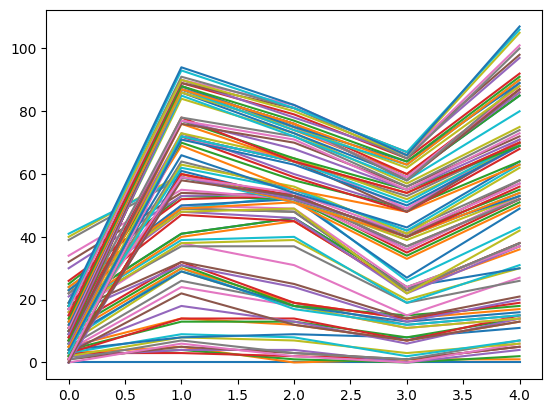

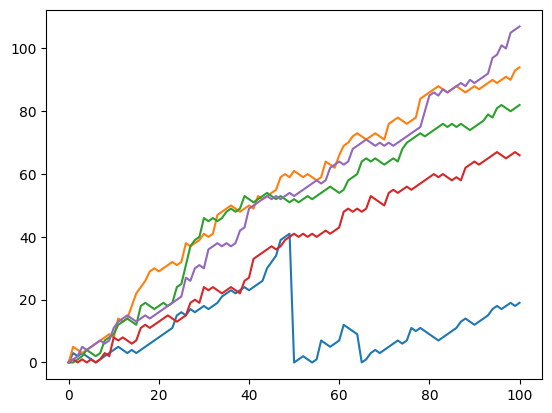

In [74]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)

all_walks = []

for i in range(5) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        random_walk.append(step)

    all_walks.append(random_walk)

# Convert all_walks to NumPy array: np_aw
np_aw = np.array(all_walks)

plt.plot(np_aw)
plt.show()
plt.clf()                       # Clear the figure
np_aw_t = np.transpose(np_aw)   # Transpose np_aw: np_aw_t

plt.plot(np_aw_t)
plt.show()

# Implement Clumsiness 

As part of the rule, you may have a habit of being clumsy and have a chance of falling down 0.5% of the time. You can use another random number generation for this. You can generate a random float between 0 and 1. If this value is less than or equal to 0.005, you should reset step to 0.

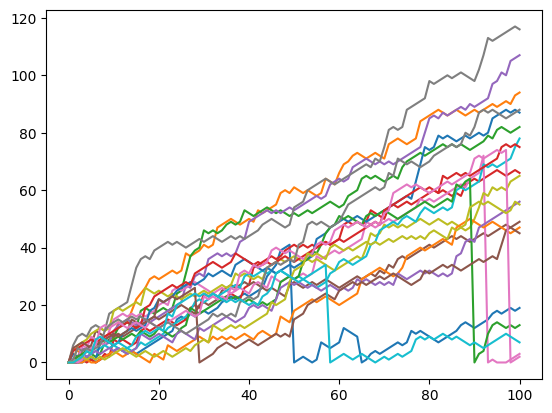

In [77]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)

all_walks = []

for i in range(20) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        if np.random.rand() <= 0.005 :
            step = 0
            
        random_walk.append(step)
        
    all_walks.append(random_walk)

# Convert all_walks to NumPy array: np_aw
np_aw = np.array(all_walks)
np_aw_t = np.transpose(np_aw)   # Transpose np_aw: np_aw_t

plt.plot(np_aw_t)
plt.show()

# Increase Simulation Number 

To make sure we've got enough simulations, simulate the random walk 500 times. Also, select the last row from `np_aw_t` and store it in a NumPy array. This contains the endpoint of all 500 random walks that was simulated. 

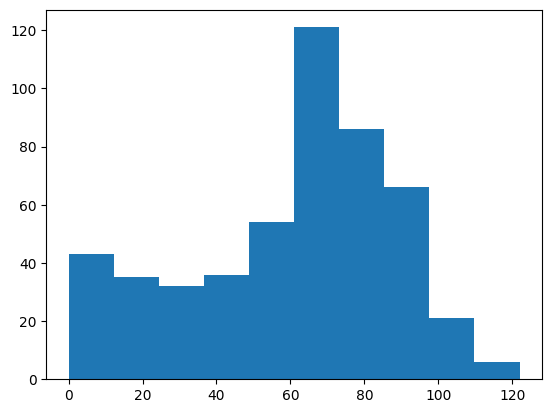

In [79]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)

all_walks = []

for i in range(500) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        if np.random.rand() <= 0.005 :
            step = 0
            
        random_walk.append(step)
        
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))
ends = np_aw_t[-1,:]  ## # Select last row from np_aw_t

plt.hist(ends)
plt.show()

# Calculating the Odds 

To calculate the chance of reaching at least 60 steps, take note of the following:

- The `ends` array contains the final steps (end points) of 500 random walks.
- Count how many integers in `ends` are greater than or equal to 60.
- Divide the count of steps >= 60 by the total number of simulations (500).
- Multiply the resulting probability by 100 to express it as a percentage.

Code:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)

all_walks = []

for i in range(500) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        if np.random.rand() <= 0.005 :
            step = 0
            
        random_walk.append(step)
        
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))
ends = np_aw_t[-1,:]  ## # Select last row from np_aw_t

# Count integers in ends that are >= 60
count_ge_60 = np.sum(ends >= 60)
probability_ge_60 = count_ge_60 / len(ends)
percentage_ge_60 = probability_ge_60 * 100

print(f"The estimated chance is {percentage_ge_60:.1f}%.")


The estimated chance is 60.8%.
